In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
#케라스에서 제공해주는 패션 MNIST데이터셋을 불러온후
#정규화
#훈련세트 검증세트 테스트세트 준비완료

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))#28X28이미지 -> 1X786이미지
    model.add(keras.layers.Dense(100, activation='relu'))#렐루함수, 뉴런 100개
    if a_layer:#사용자가 층을 추가하고 싶다면
        model.add(a_layer)#매개변수 a_layer을 통해 추가할수 있도록
    model.add(keras.layers.Dense(10, activation='softmax'))#소프트맥스함수, 출력층 10개
    return model

In [ ]:
model = model_fn()

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


손실 곡선

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
#history 객체로 각 epoch마다 loss값, accuracy값 즉,fit()함수가 반환하는 것을 받음
#verbose는 학습이 진행되는 상황을 보여줄것인지 지정 
#verbose=0 -> 훈련과정 안보여줌, verbose=1 -> 훈련과정 보여줌

In [ ]:
print(history.history.keys())
#키 값: loss, accuracy. accuracy의 경우는 metrics에서 지정했음

dict_keys(['loss', 'accuracy'])


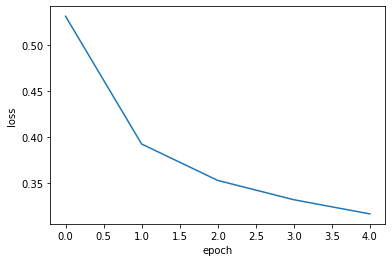

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()
#epoch가 클수록 loss가 줄어든다.

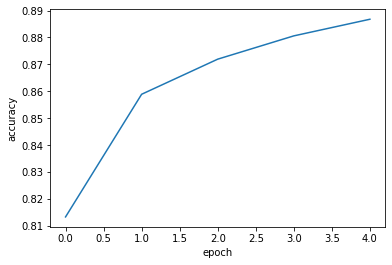

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()
#epoch가 클수록 accuracy는 증가한다.

더 많은 에포크(5->20)

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

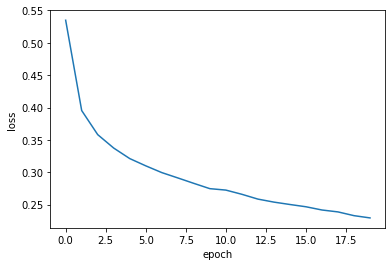

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()
#훈련세트에 더 잘맞게 된다.
#실전에서는 더 잘 안맞을수 있다
#검증세트, 테스트세트에서의 성능의 절충점을 찾을 필요있음.

검증 손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
#validation_data: 매개변수를 통해 각 epoch마다 검증 손실, 검증 정확도 확인가능

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


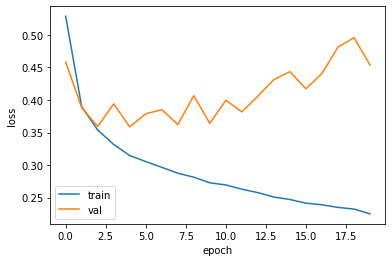

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()
#epoch가 너무 크면 검증세트의 loss값이 우상향하는 것을 알 수 있다.
#훈련세트에는 잘 맞는 검증세트에서는 잘 맞지 않는 과대적합된 모델임을 알 수 있다.

옵티마이저 사용하기(Adam)

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
#원래 옵티마이저의 기본값은 RMSprop
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

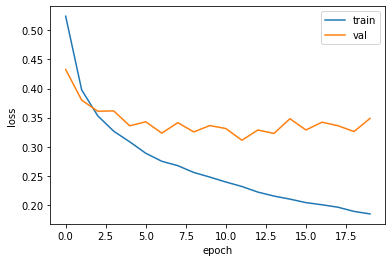

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()
#epoch가 증가되더라고 검증세트의 loss값은 급격히 상승하지는 않는다
#옵티마이저 adam이 RMSprop보다 과대적합이 줄어들었다
#learning rate로도 조정가능

드롭아웃: 은닉층의 뉴런을 계산하지 않는다 (인공신경망의 규제)

1.매개변수를 통해여 몇% 계산하지 않을지 결정

2.어떤뉴런이 계산되지 않을지는 랜덤

장점: 뉴런이 훈련세트에 잘 맞지 않게 됨 ->특정 뉴런에 과도하게 의존되는 현상 막을 수 있다.

테스트나 평가시는 모든 뉴런 사용

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
#은닉층의 100개의 뉴런중 30%는 사용하지 않겠다고 지정
model.summary()
#드롭아웃은 입력된 값을 by pass하되 몇몇의 값을 끄는 역할을 함(100개)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

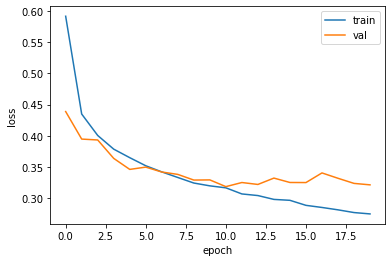

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()
#epoch가 증가되더라고 검증세트의 loss값은 급격히 상승하지는 않는다
#Dropout: 과대적합을 막음..
#옵티마이저 adam이 RMSprop보다 과대적합이 줄어들었다
#learning rate로도 조정가능

모델 저장과 복원

사용용도 : 에포크10번 하고 저장후 아 10번 더 하고 싶을때, 최적의 모델을 다시 불러 새로운 데이터 추론에 사용

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5')
#확장자 h5인 파일로 저장
#save_weights(): 가중치만 저장, 모델의 구조는 저장X-> 가중치, 절편

In [ ]:
model.save('model-whole.h5')
#save(): 모델구조 가중치 모두 저장

In [ ]:
!ls -al *.h5
#파일이 정상적으로 저장됨

-rw-r--r-- 1 root root 981736 Jul 30 02:00 best-model.h5
-rw-r--r-- 1 root root 332480 Jul 30 02:06 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul 30 02:06 model-whole.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')
#save_weights를 load_weights로 불러온다!

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
#각 샘플마다 확률값이 가장 큰 값의 인덱스 반환
#axis=0 행, axis=1 열, axis=-1
#predict_classes메소드는 클래스 레이블을 출력해주었슴. 허나 삭제될 예정
#predict():각각의 샘플마다 특성의 확률을 구해줌
print(np.mean(val_labels == val_target))#t(1),f(0)로 구분해줌

0.8815833333333334


In [ ]:
model = keras.models.load_model('model-whole.h5')
#keras.models.load_model를 통해 save된 모델을 가져온다
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.8816


[0.3265897333621979, 0.8815833330154419]

콜백: 모델이 훈련하는 도중에 자기가 지정한 작업을 수행한다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
#callbacks.ModelCheckpoint(): 훈련도중 가장 낮은 손실값을 저장

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8794


[0.3352460265159607, 0.8794166445732117]

조기종료

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
#patience: 검증세트의 점수가 증가하는 명우 몇번까지 참을 수 있는가? 2번
#restore_best_weights: 가장 손실이 낮은 가준치로 되돌려라

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)
#9번째 에포크에서 멈춤
#7번째 에포크가 검증 손실값이 가장 낮음 <결과값 - patience값>

9


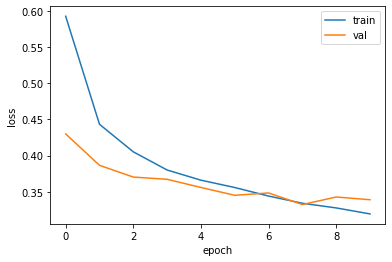

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()
#9번째 멈춤 7번째 검증 손실값 가장 낮음

In [ ]:
model.evaluate(val_scaled, val_target)
#검증세트 성능 확인

375/375 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8782


[0.33233433961868286, 0.878166675567627]